# 1. Perkenalan

Charissa Janto - Batch 9

Objective of this project is to detect edges of a particular image while using numerical calculation.


# 2. Import pustaka

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import skimage.io
import skimage.color
import skimage.filters

# 3. Data Loading

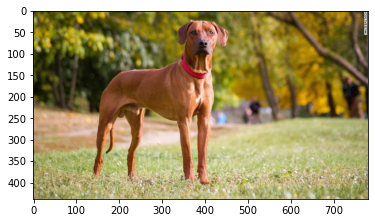

In [2]:
# plotting image
image = plt.imread ('dog.jpeg')
plt.imshow(image)

# 4. Data Cleaning

Turn image into Arrays

In [3]:
# Get image array
image

array([[[ 86,  93,  39],
        [ 88,  93,  39],
        [ 87,  90,  33],
        ...,
        [ 48,  41,  15],
        [ 46,  39,  10],
        [ 59,  52,  23]],

       [[ 77,  84,  30],
        [ 77,  84,  30],
        [ 78,  83,  25],
        ...,
        [ 46,  39,  13],
        [ 64,  57,  29],
        [ 37,  30,   1]],

       [[ 64,  73,  20],
        [ 66,  73,  19],
        [ 68,  73,  17],
        ...,
        [ 56,  48,  25],
        [ 44,  37,   9],
        [ 70,  60,  33]],

       ...,

       [[165, 151, 106],
        [159, 144, 101],
        [151, 134,  91],
        ...,
        [150, 139,  85],
        [149, 138,  84],
        [145, 134,  80]],

       [[164, 149, 106],
        [157, 142,  99],
        [149, 131,  91],
        ...,
        [155, 143,  93],
        [153, 141,  89],
        [148, 136,  84]],

       [[164, 149, 108],
        [157, 142, 101],
        [146, 131,  90],
        ...,
        [160, 148, 100],
        [157, 145,  97],
        [150, 138,  90]]

In [4]:
# Get image shape
image.shape

(438, 780, 3)

In [5]:
# Explore the RGB of image
Red = image[:,:,0]
Green = image[:,:,1]
Blue = image[:,:,2]

print('Shape R:',Red.shape)
print('Shape G:',Green.shape)
print('Shape B:',Blue.shape)

Shape R: (438, 780)
Shape G: (438, 780)
Shape B: (438, 780)


Processing the image into greyscale and also added gussian blur for better edge detection.

In [6]:
# Turn image into grey scale
grey = 0.299*Red + 0.587*Green + 0.114*Blue

In [7]:
# Blur the image to denoise
blurred_image = skimage.filters.gaussian(grey, sigma=1.0)

Check the () of the processed image

In [8]:
# Get gradient - dx and dy
dx, dy = np.gradient(blurred_image)

In [9]:
dx

array([[-6.67547441, -6.41091788, -5.65825859, ...,  8.59933733,
         4.27663984,  0.65794032],
       [-7.42820476, -7.15900964, -6.38515316, ..., 20.66339964,
        10.20917804,  4.28400965],
       [-6.86671307, -6.71374438, -6.1635008 , ..., 39.87201359,
        20.32250981,  8.19828036],
       ...,
       [-0.22468967, -1.19832235, -2.03687264, ...,  0.64088735,
         0.39070716,  0.24577699],
       [-0.5013581 , -0.90101701, -1.15887489, ...,  2.70760342,
         2.16225149,  1.65090197],
       [-0.36405843, -0.59290106, -0.75866108, ...,  2.99585359,
         2.44629229,  1.87574223]])

In [10]:
dy

array([[ -0.44548289,  -0.89056433,  -1.67333566, ...,   0.62251666,
          1.3437368 ,   1.74277014],
       [ -0.18092637,  -0.38195642,  -0.7375206 , ...,  -2.13337337,
         -2.6269617 ,  -1.87592938],
       [  0.09290734,   0.15248727,   0.26311909, ..., -14.52181489,
        -15.03565319, -10.10756664],
       ...,
       [ -4.91599468,  -5.97309489,  -6.28424165, ...,  -0.29475183,
         -1.53660073,  -2.03270648],
       [ -5.48646986,  -6.43331036,  -6.28813162, ...,  -0.94468458,
         -2.0332465 ,  -2.48485547],
       [ -5.71531249,  -6.63061168,  -6.34327213, ...,  -1.33962338,
         -2.59330218,  -3.05540552]])

Check the plottinof the grey scale image, its dx and dy


Text(0.5, 1.0, '$\\partial_y img$')

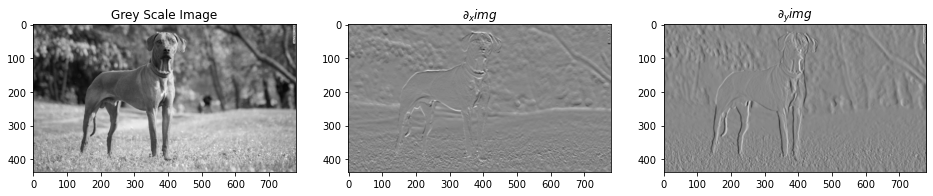

In [11]:
fig, ax = plt.subplots(ncols=3,figsize=(16,5))

ax[0].imshow(grey, cmap='gray')
ax[0].set_title('Grey Scale Image')

ax[1].imshow(dx, cmap='gray')
ax[1].set_title(r'$\partial_x img$')

ax[2].imshow(dy, cmap='gray')
ax[2].set_title(r'$\partial_y img$')

Up to this point we can see that the difference in stroke between the vertical axis filleter and the horizontal axis fillter.

The "dx img" (middle plot) we can see the dog's facial feature more clearly, while in the "dy img" (right plot) we can see more of the background landscape and the dog's lower body.

# Image Processing

1. Hitung vektor gradien (turunan parsial) masing-masing pixel untuk masing-masing sumbu x dan y 

Text(0.5, 1.0, 'gradient_magnitude')

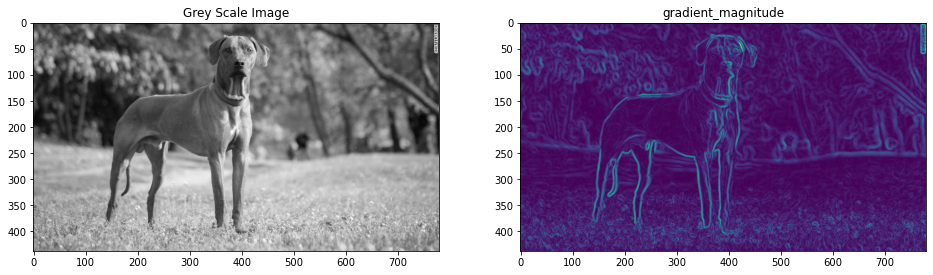

In [22]:
gradient_magnitude= np.sqrt(dx**2 + dy**2)

fig, ax = plt.subplots(ncols=2,figsize=(16,5))

ax[0].imshow(grey, cmap='gray')
ax[0].set_title('Grey Scale Image')

ax[1].imshow(gradient_magnitude)
ax[1].set_title(r'gradient_magnitude')

To further our edge detection exploration, I applied different threshold filters on this dog image.

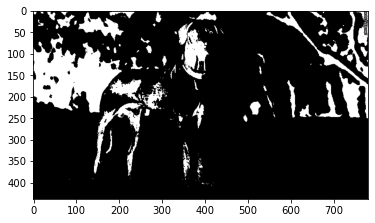

In [12]:
# Trial 1 - apply threshold 30 and plot
t1 = 70
mask = grey < t1

fig, ax = plt.subplots()
plt.imshow(mask, cmap='gray')
plt.show()

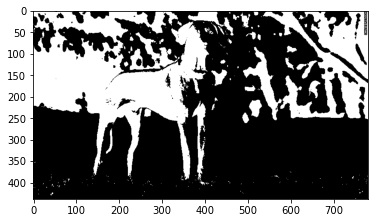

In [13]:
# Trial 2 - apply threshold 100 and plot

t2 = 100
mask2 = grey < t2

fig, ax = plt.subplots()
plt.imshow(mask2, cmap='gray')
plt.show()

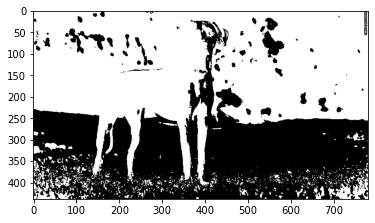

In [14]:
# Trial 3 - apply threshold 125 and plot

t3 = 150
mask3 = grey < t3

fig, ax = plt.subplots()
plt.imshow(mask3, cmap='gray')
plt.show()

In [15]:
mask2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [16]:
mask2.shape

(438, 780)

Visualisation of multiplcation between Matrix "gradient_magnitude", Matrix "Mask2" and Matrix "image red". all matrix have the same shape.

Text(0.5, 1.0, 'Mag x Threshold2 x Image Red')

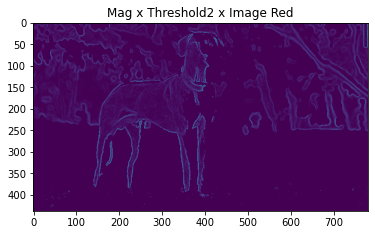

In [30]:
#Explore multiplication of matrix
plt.imshow(gradient_magnitude * mask2 * Red)
plt.title('Mag x Threshold2 x Image Red')

# 6. Hasil dan Kesimpulan

The plots above are applie using 3 differern threshold points (70, 100, 150).

We can see that threshold <= 70 the image is mostly dark, it's difficult recognize the edges of the dog. When the threshold is <= 150 the image is too bright, it's also difficult to regocnize the dog image. The best threshold applied is 100, where we can see the figure of the dog.